In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.metrics import precision_score, log_loss
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np



# Création de la sous class keras.callback

In [2]:
class MetricsHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.accuracies = []
        self.val_accuracies = []
        self.precisions = []
        self.val_precisions = []
        self.log_losses = []
        self.val_log_losses = []
    def on_epoch_end(self, epoch, logs={}):
        self.accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))
        train_pred = self.model.predict(train_images)
        val_pred = self.model.predict(test_images)
        self.precisions.append(precision_score(np.argmax(train_labels, axis=-1), np.argmax(train_pred, axis=-1), average='micro'))
        self.val_precisions.append(precision_score(np.argmax(test_labels, axis=-1), np.argmax(val_pred, axis=-1), average='micro'))
        self.log_losses.append(log_loss(np.argmax(train_labels, axis=-1), train_pred))
        self.val_log_losses.append(log_loss(np.argmax(test_labels, axis=-1), val_pred))

# Fonction pour mettre à jour le graphique


In [3]:
def update(i):
    ax1.clear()
    ax1.plot(history.accuracies[:i+1], label='Train Accuracy')
    ax1.plot(history.val_accuracies[:i+1], label='Test Accuracy')
    ax1.legend(loc='best')
    ax1.set_title('Accuracy')

    ax2.clear()
    ax2.plot(history.precisions[:i+1], label='Train Precision')
    ax2.plot(history.val_precisions[:i+1], label='Test Precision')
    ax2.legend(loc='best')
    ax2.set_title('Precision Score')

    ax3.clear()
    ax3.plot(history.log_losses[:i+1], label='Train Log Loss')
    ax3.plot(history.val_log_losses[:i+1], label='Test Log Loss')
    ax3.legend(loc='best')
    ax3.set_title('Log Loss')

# Charger les données MNIST

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data preprocessing

### Redimensionner les images pour qu'elles aient une profondeur de 1 (grayscale)

In [5]:

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))



### Normaliser les valeurs des pixels de 0-255 à 0-1

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0


### Convertir les labels en catégories one-hot

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Initialiser le modèle

In [8]:
model = Sequential()

# Premère Couche

### C1 - Couche de convolution


In [9]:
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding='same'))


c:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### S2 - Sous-échantillonnage / Couche de pooling


In [10]:

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Deuxième couche

### C3 - Couche de convolution


In [11]:
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

### S4 - Sous-échantillonnage / Couche de pooling


In [12]:

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Troisème couche

### C5 - Couche de convolution


In [13]:
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# Aplatir la sortie


In [14]:
model.add(Flatten())


# F6 - Couche entièrement connectée


In [15]:
model.add(Dense(84, activation='tanh'))

# Couche de sortie


In [16]:
model.add(Dense(10, activation='softmax'))

# Compiler le modèle


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Initialiser l'historique des métriques


In [18]:
history = MetricsHistory()

# Entraîner le modèle


In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1, validation_data=(test_images, test_labels), callbacks=[history])

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.4049 - loss: 1.9921 - val_accuracy: 0.8402 - val_loss: 0.5549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8646 - loss: 0.4738 - val_accuracy: 0.9027 - val_loss: 0.3356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9029 - loss: 0.3293 - val_accuracy: 0.9257 - val_loss: 0.2653
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9189 - loss: 0.2710 - val_accuracy: 0.9274 - val_loss: 0.2444
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9286 -

# Créer une animation


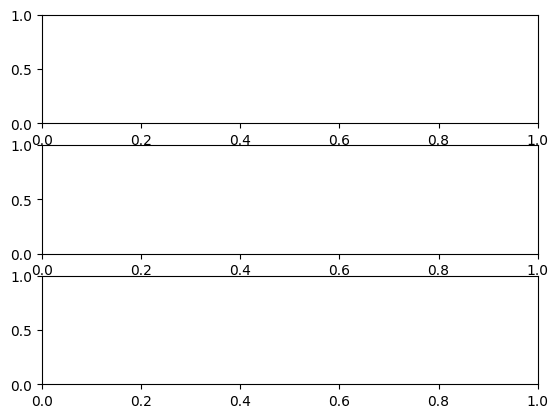

c:\Users\Miguel\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# Fonction pour mettre à jour le graphique
def update(i):
    ax1.clear()
    ax1.plot(history.accuracies[:i+1], label='Train Accuracy')
    ax1.plot(history.val_accuracies[:i+1], label='Test Accuracy')
    ax1.legend(loc='best')
    ax1.set_title('Accuracy')

    ax2.clear()
    ax2.plot(history.precisions[:i+1], label='Train Precision')
    ax2.plot(history.val_precisions[:i+1], label='Test Precision')
    ax2.legend(loc='best')
    ax2.set_title('Precision Score')

    ax3.clear()
    ax3.plot(history.log_losses[:i+1], label='Train Log Loss')
    ax3.plot(history.val_log_losses[:i+1], label='Test Log Loss')
    ax3.legend(loc='best')
    ax3.set_title('Log Loss')

# Créer l'animation
ani = FuncAnimation(fig, update, frames=range(len(history.accuracies)), repeat=True)

# Afficher l'animation
plt.show()
from IPython.display import HTML
HTML(ani.to_jshtml())


# Tracer les métriques


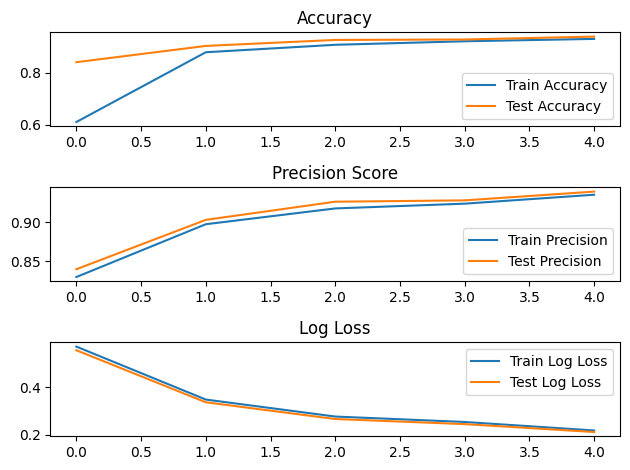

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(history.accuracies, label='Train Accuracy')
ax1.plot(history.val_accuracies, label='Test Accuracy')
ax1.legend(loc='best')
ax1.set_title('Accuracy')

ax2.plot(history.precisions, label='Train Precision')
ax2.plot(history.val_precisions, label='Test Precision')
ax2.legend(loc='best')
ax2.set_title('Precision Score')

ax3.plot(history.log_losses, label='Train Log Loss')
ax3.plot(history.val_log_losses, label='Test Log Loss')
ax3.legend(loc='best')
ax3.set_title('Log Loss')

plt.tight_layout()
plt.show()